## University of California, Berkeley
## Chem 274B: Software Engineering Fundamentals for Molecular Sciences Final Project
### Creators:  Francine Bianca Oca, Kassady Marasigan and Korede Ogundele
### Date Created: December 5, 2023

This file contains functions and plots that pertain to our allele frequency model.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

# Output 1: Display an image of the current CA configuration
### not done

In [ ]:
# initiate python grid plot (made up words by Korede)
# intake population matrix, create graph that shows a unique color for each state


# Output 2: Count the number of individuals in the population that are a particular genotype.

In [27]:
def display_genotype_count(genotype, generation_number):
    """
    Displays the number of individuals in a given genotype at a specific generation.

    Parameters
    ----------
    genotype : str
        the genotype to count individuals for (homozygous dominant, heterozygous, or recessive)
    generation_number : int
        the generation number in the simulation.

    Returns
    -------
    A print statement saying the number of individuals of the chosen genotype in the chosen generation.
    """
    # Open text file containing generation counts
    with open('../../Bin/simulation_output.txt', 'r') as file:
        output_lines = file.readlines()

    # Find index of the line that starts with 'Generation {generation_number}:'
    start_index = None
    for i, line in enumerate(output_lines):
        if line.startswith(f'Generation {generation_number}:'):
            start_index = i + 1  # skip the line with the generation name
            break

    # If the generation is not found, print an error message
    if start_index is None:
        print(f'ERROR: Generation {generation_number} does not exist') 

    # Extract lines for desired generation
    generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines

    # Flatten the generation lines into a single string and split by space
    generation_data = ' '.join(generation_lines).split()

    # Count the occurrences of each integer, write into a dictionary (counts)
    counts = {}
    for value in generation_data:
        counts[int(value)] = counts.get(int(value), 0) + 1

    # Get counts as a percentage of total population
    if genotype == 'homozygous dominant':
        print(f'There are {counts[1]} {genotype} individuals in {generation_number}.')
    if genotype == 'heterozygous':
        print(f'There are {counts[2]} {genotype} individuals in {generation_number}.')
    if genotype == 'recessive':
        print(f'There are {counts[3]} {genotype} individuals in {generation_number}.')

In [31]:
display_genotype_count(genotype = "recessive", generation_number= 5)

There are 45 recessive individuals in 5.


# Output 3: Bar graph that displays allele frequency of a chosen generation
### come back to this later; it won't print for all generations

In [14]:
def plot_generation_counts(generation_number, total_population):
    """
    This function plots the number of each individuals that have a certain genotype as a bar graph

    Parameters
    ----------
    generation_number : int
        The generation number whose allele frequencies we would like to look at
    total_population : int
        The total number of individuals in the population

    Returns
    -------
    A bar graph with proportions of each allele frequency.

    """
    # Open text file containing generation counts
    with open('../../Bin/simulation_output.txt', 'r') as file:
        output_lines = file.readlines()

    # Find index of the line that starts with 'Generation {generation_number}:'
    start_index = None
    for i, line in enumerate(output_lines):
        if line.startswith(f'Generation {generation_number}:'):
            start_index = i + 1  # skip the line with the generation name
            break

    # If the generation is not found, print an error message
    if start_index is None:
        print(f'ERROR: Generation {generation_number} does not exist') 

    # Extract lines for desired generation
    generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines

    # Flatten the generation lines into a single string and split by space
    generation_data = ' '.join(generation_lines).split()

    # Count the occurrences of each integer, write into a dictionary (counts)
    counts = {}
    for value in generation_data:
        counts[int(value)] = counts.get(int(value), 0) + 1

    # Get counts as a percentage of total population
    GG_proportion = counts[1] / total_population
    Gg_proportion = counts[2] / total_population
    gg_propotion = counts[3] / total_population

    # Plot
    labels = ['Homozygous Dominant', 'Heterozygous', 'Recessive']
    proportions = [GG_proportion, Gg_proportion, gg_propotion]

    plt.bar(labels, proportions, color=['royalblue', 'mediumslateblue', 'mediumorchid'])
    plt.title(f'Allele Percentages for Generation {generation_number}')
    plt.xlabel('Genotype')
    plt.ylabel('Proportion of Population')
    plt.show()


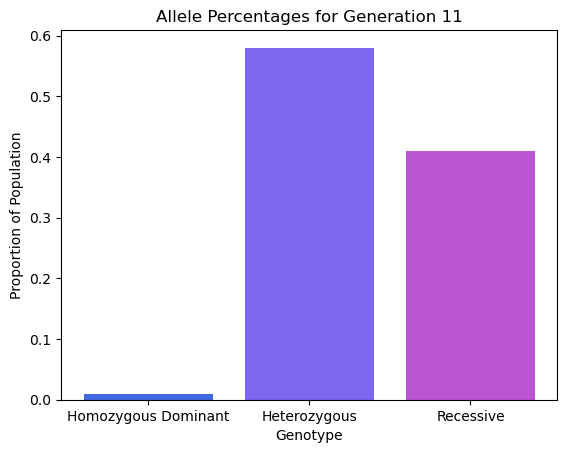

In [21]:
plot_generation_counts(generation_number= 11, total_population= 100)

# Output 4: Filled area plot to visualize how allele frequency changes over generations

In [80]:
def extract_generation_counts_to_df(filename, generation_number):
    """
    This function extracts number of each individuals of each phenotype from the generation count output text and puts the data into a dataframe. The resulting dataframe can be used to produce plots.

    Parameters
    ----------
    filename : str
    Name of file you'd like to extract counts from (include file extension)
    
    Returns
    -------
    df : Pandas dataframe
    A pandas dataframe with generation counts. It's much easier to make graphs with seaborn and plotly once you have a dataframe.
    """
    # Open text file containing generation counts
    with open(filename, 'r') as file:
        output_lines = file.readlines()

    # Initialize a dictionary to store counts for each generation
    all_counts = {}

    # Iterate through each generation
    for generation_number in range(1, generation_number+1):
        # Find index of the line that starts with 'Generation {generation_number}:'
        start_index = None
        for i, line in enumerate(output_lines):
            if line.startswith(f'Generation {generation_number}:'):
                start_index = i + 1  # skip the line with the generation name
                break
        
        # If the generation is not found, print an error message
        if start_index is None:
            print(f'ERROR: Generation {generation_number} does not exist') 
            continue

        # Extract lines for the desired generation
        generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines

        # Flatten the generation lines into a single string and split by space
        generation_data = ' '.join(generation_lines).split()

        # Count the occurrences of each integer, write into a dictionary (counts)
        counts = {}
        for value in generation_data:
            counts[int(value)] = counts.get(int(value), 0) + 1

        # Save counts for the current generation in the all_counts dictionary
        all_counts[generation_number] = counts

    # Create a dataframe from the dictionary
    df = pd.DataFrame(all_counts)

    # Transpose so that rows (genotypes) become columns
    df = df.T

    # Set NaN values to 0
    df =  df.fillna(0)

    # Add column with generation number
    df['Generation'] = list(range(0, 50))

    # Rename columns
    #new_columns = {'2': 'Heterozygous', '1': 'Homozygous Dominant', '3': 'Recessive'}  
    #df = df.rename(columns=new_columns)
    df.columns = {'2': 'Heterozygous', '1': 'Homozygous Dominant', '3': 'Recessive', 'Generation': 'Generation'}

    return df
    


In [81]:
test_df = extract_generation_counts_to_df(filename= '../../Bin/simulation_output.txt', generation_number= 50)
test_df.head()

,2,1,3,Generation
1,82.0,15.0,3.0,0
2,62.0,37.0,1.0,1
3,61.0,39.0,0.0,2
4,65.0,34.0,1.0,3
5,52.0,45.0,3.0,4


In [82]:
fig = px.area(test_df, x='Generation', y=['2','1', '3'])
fig.show()